In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# 1. Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [3]:
# 2. Train a single decision tree
tree = DecisionTreeRegressor(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Single Decision Tree MSE:", mse_tree)


Single Decision Tree MSE: 0.5401962207714344


In [5]:
# 3. Train a Bagging Regressor (ensemble of trees)
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=50,          # number of trees
    max_samples=0.8,          # fraction of samples for each tree
    bootstrap=True,           # sampling with replacement
    random_state=0,
    n_jobs=-1                 # parallel training
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

# Evaluate
mse_bag = mean_squared_error(y_test, y_pred_bag)
print("Bagging Regressor MSE:", mse_bag)

Bagging Regressor MSE: 0.47547945670446534


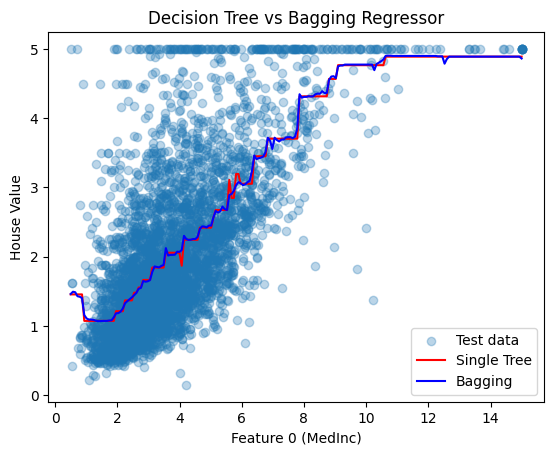

In [7]:
# 4. Visualization: Compare predictions for feature 0
# (for learning purposes, use only one feature to see the curves)
X_feature = X_test[:, 0].reshape(-1, 1)
x_range = np.linspace(X_feature.min(), X_feature.max(), 200).reshape(-1, 1)

tree_small = DecisionTreeRegressor(max_depth=5, random_state=0)
tree_small.fit(X_train[:, [0]], y_train)
bagging_small = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=50, random_state=0
)
bagging_small.fit(X_train[:, [0]], y_train)

y_tree_curve = tree_small.predict(x_range)
y_bag_curve = bagging_small.predict(x_range)

plt.scatter(X_feature, y_test, alpha=0.3, label="Test data")
plt.plot(x_range, y_tree_curve, color="red", label="Single Tree")
plt.plot(x_range, y_bag_curve, color="blue", label="Bagging")
plt.xlabel("Feature 0 (MedInc)")
plt.ylabel("House Value")
plt.legend()
plt.title("Decision Tree vs Bagging Regressor")
plt.show()